<a href="https://colab.research.google.com/github/jpandersen61/SQLLiteNotebooks/blob/main/Database_Constraints_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Database SQL constraints

Formålet med denne notebook er en lille øvelse i at arbejde med nogle af de constraint muligheder, der findes i SQL: De vil sige introduktion af begrænsninger i databasestrukturen, som skal sikrer, at databasen er sammenhængende og valid. Databasen vi arbejder med, er lavet med udgangspunkt i nedenstående ER-Diagram.

Der er blevet blevet lagt 2 trin ind i notebook'en med hver sin overskrift:


*   **Slet en studerende**, som sletter den studerende, der har `StudentID` lig med 1. Læg mærke til at selve udførelsen med `execute` kommandoen er lagt ind i en Python `try ... except ...` block. Herved bliver resultatet af kommandoen skrevet ud.
*   **Opret en nonsense registrering af kursus deltagelse**, som lægger en registrering af en karakter - `Grade` - 'x' , der ikke er gyldig, ned i databasen. Der er her på tilsvarende vis indført en `try ... except ...` blok til visning af resultatet af kommandoen.

Det er forhold omkring disse 2 eksekveringstrin, vi skal undersøge i opgaven.



**Opgave(r):**
1.   Undersøg alle database forespørgsler i sektionen **Udtræk al data fra alle tabeller**. Er der har tale om valid og sammenhængende database?
2. Check resultaterne af de 2 de ovenstående eksekveringstrin. Er de hensigtsmæssige?
3. Læg [FOREIGN KEY](https://www.w3schools.com/sql/sql_foreignkey.asp) constraints ind på `StudentID` og `CourseID` attributterne i `StudentCourse` tabellen.
4. Kør hele notebook'en igen og observer hvilken virkning denne constraint har? Er det OK?
5. Tilføj [ON DELETE CASCADE](https://www.geeksforgeeks.org/mysql/mysql-on-delete-cascade-constraint/) til dine FOREIGN KEY constraints.
6. Kør hele notebook'en igen og observer hvilken virkning dette har? Er det OK?
7. Læg følgende [CHECK](https://www.w3schools.com/sql/sql_check.asp) constraint ind i `StudentCourse` tabellen: `CHECK (Grade='a' OR Grade='b' OR Grade='c' OR Grade='d' OR Grade='e')`  
8. Ændrer det tingenes tilstand til det bedre?














##ER-Diagram

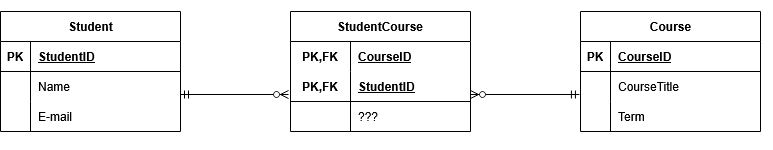

##Importing needed modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

##Connecting to the database

I denne notebook benyttes [SQLite](https://sqlite.org/) databasen, der som det antydes er 'light', men som alligevel er OK til vores formål her, hvilket er at udvikle en database snarere end at drifte den.

In [2]:
##Avoiding the 'database locked' error:

##Close the 'cursor' if present before proceeding
if 'SQLiteCursor' in globals():
    SQLiteCursor.close()

##Close the database connection if present before proceeding
if 'SQLiteConnetion' in globals():
    SQLiteConnetion.close()

In [3]:
#Get connection to the sales system data - initially get an empty one
SQLiteConnetion = sqlite3.connect('demo.db')

In [4]:
# create cursor object
SQLiteCursor = SQLiteConnetion.cursor()

##Slet eksisterende tabeller i databasen

Nedenstående SQL script bliver udført for at "rydde" databasen. Tabeller der er afhængige af andre tabeller bliver slettet først. Det er praktisk at slette alle tabeller først, fordi vi så undgår at skulle ændre i eksisterende tabeller og vi skal så kun koncentrere os om at oprette tabeller påny.

In [5]:
SQLDropTableScript = """
DROP TABLE IF EXISTS StudentCourse;
DROP TABLE IF EXISTS Student;
DROP TABLE IF EXISTS Course;
"""

In [6]:
SQLiteCursor.executescript(SQLDropTableScript)

##Oprettelse af database-tabeller

Nedenstående SQL scripts opretter tabellerne i databasen.

Bemærk: `PRAGMA foreign_keys=...` sikrer, at SQL `FOREIGN KEY ... REFERENCES` fungerer

In [7]:
SQLCreateDatabase = """
  PRAGMA foreign_keys=off;

  CREATE TABLE Student (
     StudentID int NOT NULL PRIMARY KEY,
     Name VARCHAR(50) NOT NULL,
     EMail VARCHAR(100) NOT NULL
     );

  CREATE TABLE Course (
    CourseID int NOT NULL PRIMARY KEY,
    CourseTitle VARCHAR(50) NOT NULL,
    Term int NOT NULL
    );

 CREATE TABLE StudentCourse (
    StudentID int NOT NULL,
    CourseID int NOT NULL,
    Grade char,
    PRIMARY KEY (StudentID,CourseID)
    );

PRAGMA foreign_keys=on;
"""

In [8]:
SQLiteCursor.executescript (SQLCreateDatabase)

##Indsæt data i databasen

Nedenstående SQL-scripts indsætter data i databasen. Dette er meget nyttigt for at kunne indsætte eksempel-og testdata, hvor med vi kan demonstrere og teste vores forespørgsler til databasen.

In [9]:
SQLInsertStudents = """
INSERT INTO Student (StudentID, Name, EMail) VALUES
(1,	'Jane Ford',	'jafo@gmail.com'),
(2,	'Bob Steward',	'bobs@yahoo.com'),
(3,	'Rick Fargo',	'rifgo@outlook.com');
"""

In [10]:
SQLiteCursor.execute(SQLInsertStudents)

In [11]:
SQLInsertCourses = """
INSERT INTO Course (CourseID, CourseTitle, Term) VALUES
(1,'Physics',4),
(2,'Mathematics', 4);
"""

In [12]:
SQLiteCursor.execute(SQLInsertCourses)

In [13]:
SQLInsertStudentCourses = """
INSERT INTO StudentCourse (StudentID,CourseID, Grade) VALUES
(1,1,'e'),
(1,2,'a'),
(2,1,'c'),
(2,2,'c'),
(3,1,'d');
"""

In [14]:
SQLiteCursor.execute(SQLInsertStudentCourses)

## Slet en studerende

In [15]:
SQLDeleteStudent = """
DELETE FROM Student WHERE StudentID=1;
"""

In [16]:
try:
  SQLiteCursor.execute(SQLDeleteStudent)
  print("OK")
except:
  print("An error occurred: Could NOT delete student")


OK


## Opret en nonsense registrering af kursus deltagelse

In [17]:
SQLInsertNonsenseStudentCourse = """
INSERT INTO StudentCourse (StudentID,CourseID, Grade) VALUES
(3,2,'x');
"""

In [18]:
try:
  SQLiteCursor.execute(SQLInsertNonsenseStudentCourse)
  print("OK")
except:
  print("An error occurred: Could NOT register enrollment")

OK


##Udtræk al data fra alle tabeller

Nedentående scripts trækker alle informationer ud af alle tabeller i databasen. Dette er nyttigt at kunne afgøre om data er blevet importeret korrekt.

In [19]:
SQLSelectAllFromStudent = """
SELECT * FROM Student
"""
DataFrame = pd.read_sql(SQLSelectAllFromStudent, SQLiteConnetion)
DataFrame

,StudentID,Name,EMail
0,2,Bob Steward,bobs@yahoo.com
1,3,Rick Fargo,rifgo@outlook.com


In [20]:
SQLSelectAllFromCourse = """
SELECT * FROM Course
"""
DataFrame = pd.read_sql(SQLSelectAllFromCourse, SQLiteConnetion)
DataFrame

,CourseID,CourseTitle,Term
0,1,Physics,4
1,2,Mathematics,4


In [21]:
SQLSelectAllFromStudentCourse = """
SELECT * FROM StudentCourse
"""
DataFrame = pd.read_sql(SQLSelectAllFromStudentCourse, SQLiteConnetion)
DataFrame

,StudentID,CourseID,Grade
0,1,1,e
1,1,2,a
2,2,1,c
3,2,2,c
4,3,1,d
5,3,2,x


In [22]:
SQLSelectAllFromDatabase = """
SELECT *
FROM Student
JOIN StudentCourse ON Student.StudentID=StudentCourse.StudentID
JOIN Course ON StudentCourse.CourseID=Course.CourseID;
"""
DataFrame = pd.read_sql(SQLSelectAllFromDatabase, SQLiteConnetion)
DataFrame

,StudentID,Name,EMail,StudentID,CourseID,Grade,CourseID,CourseTitle,Term
0,2,Bob Steward,bobs@yahoo.com,2,1,c,1,Physics,4
1,2,Bob Steward,bobs@yahoo.com,2,2,c,2,Mathematics,4
2,3,Rick Fargo,rifgo@outlook.com,3,1,d,1,Physics,4
3,3,Rick Fargo,rifgo@outlook.com,3,2,x,2,Mathematics,4


In [23]:
SQLSelectAllFromDatabaseLimited = """
SELECT Student.StudentID,Student.Name,StudentCourse.Grade,Course.CourseID,Course.CourseTitle,Course.Term
FROM Student
JOIN StudentCourse ON Student.StudentID=StudentCourse.StudentID
JOIN Course ON StudentCourse.CourseID=Course.CourseID;
"""
DataFrame = pd.read_sql(SQLSelectAllFromDatabaseLimited, SQLiteConnetion)
DataFrame

,StudentID,Name,Grade,CourseID,CourseTitle,Term
0,2,Bob Steward,c,1,Physics,4
1,2,Bob Steward,c,2,Mathematics,4
2,3,Rick Fargo,d,1,Physics,4
3,3,Rick Fargo,x,2,Mathematics,4
